In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
avocado = pd.read_csv(
    "avocado.csv",
    index_col=0,
)
avocado.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11,2017-10-15,2.62,1100.10,24.83,384.79,0.00,690.48,657.77,32.71,0.00,organic,2017,MiamiFtLauderdale
37,2016-04-10,0.79,7275842.54,2750665.83,1941317.22,177612.73,2406246.76,1619230.76,780038.56,6977.44,conventional,2016,West
2,2017-12-17,1.93,12068.26,183.22,3070.56,0.00,8814.48,8784.92,29.56,0.00,organic,2017,HartfordSpringfield
33,2015-05-10,1.17,2956859.19,721935.59,1299998.70,190755.81,744169.09,679213.00,64322.24,633.85,conventional,2015,Midsouth
6,2018-02-11,0.70,8043965.41,3886584.49,917502.14,24745.18,3215133.60,2589009.32,574460.87,51663.41,conventional,2018,SouthCentral


In [3]:
##Create a line plot showing the average price of avocado over months

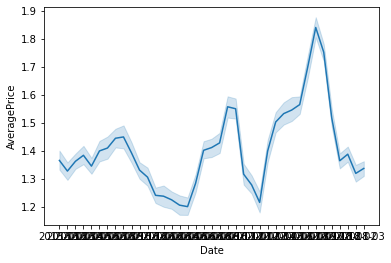

In [4]:
months = avocado.Date.map(lambda m: m[:7])
sns.lineplot(
    x=months,
    y="AveragePrice",
    data=avocado,
)

In [5]:
##Create a horizontal bar plot showing 10 highest mean prices depending on region

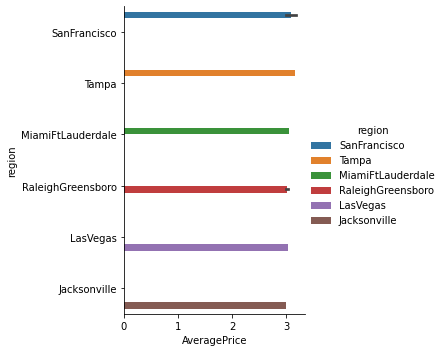

In [65]:
temp = avocado.loc[:,["AveragePrice","region"]]
temp = temp.sort_values(by="AveragePrice", ascending=False)
t = temp[:10]
sns.catplot(
    x="AveragePrice",
    y="region",
    hue="region",
    kind="bar",
    data = t
)

In [7]:
##Create a count plot for the year of the avocado

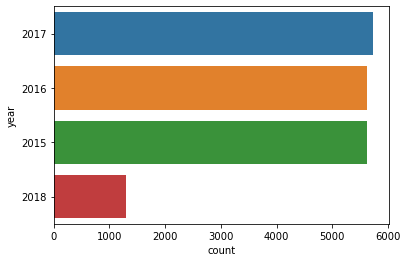

In [8]:
sns.countplot(
    y="year",
    order=avocado["year"].value_counts().index,
    data=avocado,
)

In [9]:
##Create a scatter plot of average price vs `Total Volume` for year 2018, when the `Total Volume` is lower than `1e6`

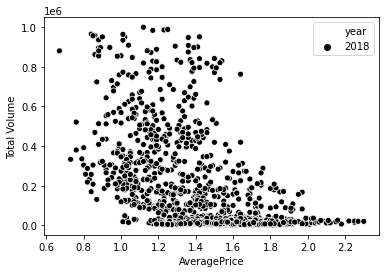

In [10]:
DwaK18 = avocado.loc[:,["year","AveragePrice","Total Volume"]]
DwaK18 = DwaK18.loc[DwaK18.year.isin([2018])]
DwaK18 = DwaK18.loc[DwaK18["Total Volume"] <1e6 ]
sns.scatterplot(
    x="AveragePrice",
    y="Total Volume",
    hue="year",
    palette = {
        2018: "#000000"
    },
    data = DwaK18
    )


In [11]:
##Show the `AveragePrice` distribution.

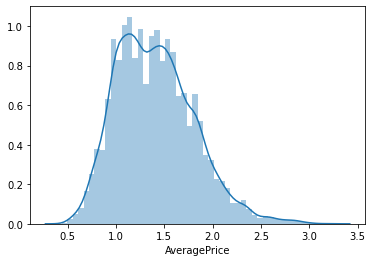

In [13]:
sns.distplot(avocado.AveragePrice)

In [ ]:
##Create a clustermap of avocado correlations.

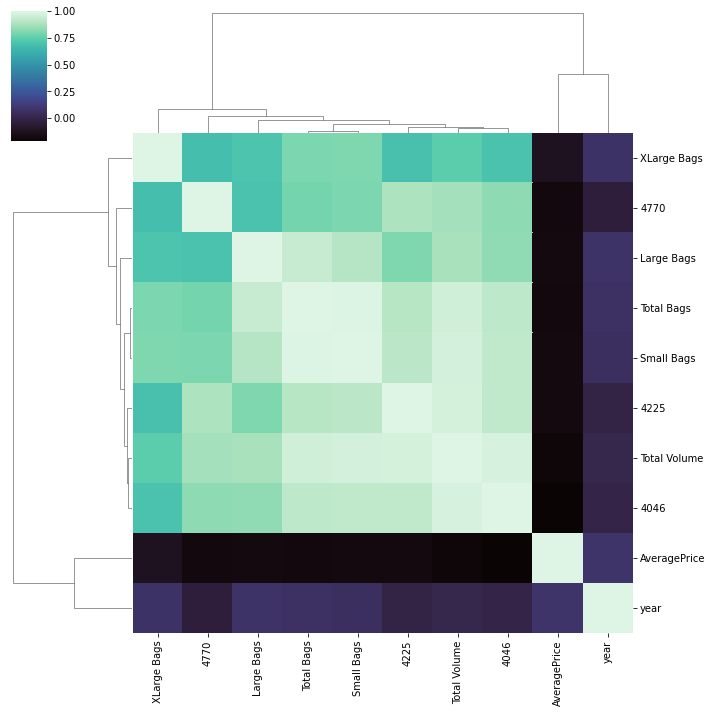

In [14]:
sns.clustermap(
    avocado.corr(),
    cmap = "mako"
)

In [ ]:
##Show a boxplot of average price per year.

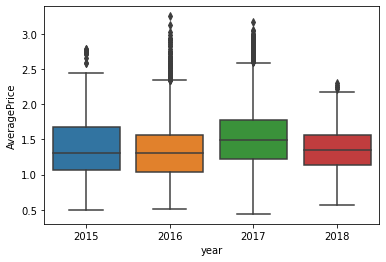

In [17]:
sns.boxplot(
    x="year",
    y="AveragePrice",
    data=avocado
)